<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Cas d'estudi de mineria de dades</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>Mineria de dades</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Jordi Gironés Roig <br><span style="margin-left: 30px;">Coordinació: Julià Minguillón Alfonso</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Índex de continguts

1. [Introducció](#Introducció)

2. [Llibreries Python necessàries](#Llibreries-Python-necessàries)

3. [Presentació de New Diagnosi LLC](#Presentació-de-New-Diagnosi-LLC)

4. [Pas 1: Establiment d'un objectiu analític](#Pas-1:-Establiment-d-un-objectiu-analític)

5. [Pas 2: Verificació de les dades](#Pas-2:-Verificació-de-les-dades)

6. [Pas 3: Preparació de les dades](#Pas-3:-Condicionament-de-les-dades)

7. [Pas 4: Anàlisi exploratòria](#Pas-4:-Anàlisi-exploratòria)

8. [Pas 5: Classificació](#Pas-5:-Classificació)

9. [Pas 6: Reproductibilitat](#Pas-6:-Reproductibilitat)

10. [Conclusions](#Conclusions)

11. [Agraïments](#Agraïments)

## Introducció

[[ inici del document ]](#Index-de-continguts)

En aquest document presentem un **flux analític complet i contextualitzat** en l'àmbit d'un cas d'estudi, ja que entenem que l'analítica de dades ha d'enfocar-se d'una manera holística, és a dir, la dada i el que aquesta descriu formen un nucli inseparable.  

Al llarg de l'assignatura de **mineria de dades** s'han estudiat diferents tècniques amb l'objectiu d'exposar cadascuna de les fases que comprèn un procés d'extracció de coneixement a partir d'un joc de dades en brut. En aquest *notebook* Jupyter farem servir el llenguatge Python per mostrar un flux analític complet de principi a fi.

Més enllà de presentar un exemple analític fàcilment reproduïble en què es disposa de codi i dades, hem volgut mantenir el focus en el fet de transmetre un estil de **bones pràctiques** perquè l'estudiant pugui créixer com a *data scientist*, ser més efectiu i, sobretot, **més col·laboratiu**.


## Llibreries Python necessàries

[[ go back to the top ]](#Index-de-continguts)

Si no teniu instal·lat Python, us proposem utilitzar la distribució d'Anaconda, que, al seu torn, ens permet treballar amb Jupyter. A l'enllaç següent [Anaconda Python distribution](https://www.anaconda.com/download) trobareu tot el que necessiteu per dur a terme la instal·lació. 

Aquest *notebook* fa servir diversos paquets Python que venen preinstal·lats amb la distribució Anaconda de Python. Aquesta és la llista dels més rellevants:

* **NumPy**: conté una col·lecció de funcions que faciliten el càlcul numèric amb matrius.
* **pandas**: permet treballar amb estructures de dades tipus *DataFrame*.
* **scikit-learn**: es tracta d'una col·lecció de funcions habituals en el món de la intel·ligència artificial.
* **matplotlib**: és una llibreria especialitzada en la generació de gràfics.
* **Seaborn**: conté funcions avançades per a la generació de gràfics estadístics.

Per facilitar el procés d'instal·lació, també us facilitem les ordres necessàries per a `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
`conda` s'encarregarà de preguntar-nos si volem instal·lar una versió més recent del paquet en cas que aquest ja estigui instal·lat.


## Presentació de New Diagnosi LLC

[[ inici del document ]](#Index-de-continguts)

Aprofitant el nostre coneixement en els àmbits de la mineria de dades i les anàlisis clíniques, hem fundat una *start-up* dedicada a facilitar eines de diagnòstic a hospitals.

La nostra proposta és signar contractes de col·laboració amb diferents hospitals perquè ens cedeixin dades sobre analítiques de pacients que farem servir per entrenar els nostres models predictius amb l'objectiu de facilitar i accelerar el procés de diagnòstic en futurs casos.

<img src="images/freeimage-17688714-web.jpg" style="width:400px;height:283px;" />

El nostre objectiu és fer un pas més enllà i ser capaços d'identificar variants o graus d'intensitat de la malaltia, de manera que es puguin implementar tractaments menys generalistes i més orientats a cada tipologia concreta. Incrementar la precisió en el diagnòstic i el tractament afectarà també la reducció d'efectes secundaris, que en moltes ocasions poden acabar suposant un greu problema per al pacient.


**Nota:** el joc de dades amb el qual treballarem és fictici i es proporciona juntament amb aquest *notebook*.

## Pas 1: establiment d'un objectiu analític

[[ inici del document ]](#Index-de-continguts)

El primer pas que hauríem de fer com a analistes de dades és **establir el nostre objectiu analític**. Dit d'una altra manera, redactar la pregunta o plantejar el problema que tractarem de resoldre. Recordem la màxima següent: **una bona resposta requereix una bona pregunta**.

De la mateixa manera, també haurem de fixar quines mesures farem servir per calcular el grau de compliment de l'objectiu plantejat. La pregunta següent pot ajudar-nos en aquesta primera tasca:

>Has especificat la tipologia de pregunta analítica a la qual t'enfrontes (p. ex. classificació, segmentació, associació, regressió...) abans de començar a treballar amb les dades?

Classificarem variants d'un tipus de malaltia a partir d'analítiques de pacients que prèviament sabíem que patien aquesta variant. Així doncs, es tracta d'un problema de classificació.


>Has establert com mesuraràs el grau de compliment del teu objectiu analític?

Atès que ens enfrontem a un problema de classificació, hem pensat a utilitzar com a mesura el concepte de **precisió** (https://en.wikipedia.org/wiki/accuracy_and_precision) —proporció de variants classificades correctament— per quantificar el rendiment del nostre model de classificació. El responsable de dades de New Diagnosis LLC ha establert que vol arribar al 90% de precisió.

>Has entès bé el context de l'objectiu plantejat i les seves possibles aplicacions?

Estem construint una part de la funcionalitat del nostre motor de classificació, responsable de les habilitats de classificació de variants de malalties etiquetades i a partir d'anàlisis clíniques associades. En el futur, aquest motor s'integrarà amb més i més hospitals per incrementar les seves capacitats d'aprenentatge.

>Has establert un procediment per recopilar dades per a la demo?

El responsable de dades de New Diagnosis LLC ens ha explicat que els científics de camp aprofitaran els primers contractes d'intercanvi d'informació signats amb dos hospitals que cediran les dades degudament anonimitzades i relacionades amb tres variants d'una malaltia identificada a partir de marcadors presents en les anàlisis clíniques habituals. Inicialment disposem de dades de 180 pacients, sobre els quals s'han realitzat estudis tant de diagnòstic com de seguiment de la malaltia amb l'objectiu de completar millor el procés de captura d'informació. Finalment, les dades recollides es recopilen en un joc de dades que s'emmagatzema en un repositori GitHub d'una empresa privada.

>T'has plantejat si realment el teu objectiu analític es pot respondre a partir de les dades disponibles?

El joc de dades del qual disposem per a aquesta demo només conté dades de tres variants d'una malaltia. Com a conseqüència, el model de classificació generat només servirà per classificar una de les tres variants sobre les quals s'ha capturat informació en el joc de dades. Si volguéssim construir un classificador més general, hauríem de recopilar més dades.

<hr />

Observeu que ja fa força estona que treballem i no hem escrit ni una sola línia de codi ni visualitzat cap dada.

**Pensar en estratègies i documentar el problema sobre el qual treballarem és un pas necessari que repercutirà en la qualitat del treball analític i que sovint no es té en compte**.

## Pas 2: verificació de les dades

[[ inici del document ]](#Index-de-continguts)

El pas següent és donar un cop d'ull al joc de dades. Aquest sempre pot contenir errors i és important que els gestionem abans d'iniciar el nostre estudi analític.

En general, tractarem de respondre a les preguntes següents:

* El joc de dades conté errors?
* Hi ha coses estranyes entre les dades?
* Necessitaré corregir o fins i tot eliminar part de les dades?

Comencem per llegir el joc de dades a través del *DataFrame* de la llibreria Pandas.


In [ ]:
# Si feu servir Google Colab, activeu aquest codi
#from google.colab import drive
#drive.mount('/content/drive')
#filename = '/content/drive/MyDrive/diagnosis-data.csv'

# Si tens Jupyter o Python Notebook instal·lat localment
filename = '/nom-carpeta-local/diagnosis-data.csv'

import pandas as pd
diagnosis_data = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Observem que el nostre joc de dades conté 180 files o diagnòstics de pacients i divuit columnes, de les quals disset corresponen a marcadors sobre les anàlisis clíniques que se'ls ha practicat.

Visualitzem, per exemple, les catorze primeres columnes, en què apreciem que la columna `class` conté el diagnòstic i la resta de columnes són els diferents marcadors clínics.

In [ ]:
diagnosis_data.iloc[:, 0:14].head()

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB
0,variantA,6.4,4.9,2.9,1.8,15.93,3.51,4.33,17.7,129.2,5.10,5.46,2.78,4.89
1,variantA,6.2,4.4,2.9,1.8,14.90,3.58,4.04,13.3,102.2,4.95,5.16,2.76,3.88
2,variantA,6.0,4.6,2.8,1.8,14.86,4.16,4.57,20.7,103.2,5.10,5.64,2.80,5.41
3,variantA,5.9,4.5,3.0,1.8,16.07,3.75,4.40,18.9,115.2,6.15,5.89,2.74,4.78
4,variantA,6.3,5.0,2.9,1.8,14.94,4.39,4.77,23.1,120.2,5.10,5.09,2.89,4.42


Comencem bé: sembla que el joc de dades fa bona pinta.

La primera fila del joc de dades conté els noms de les característiques, que són prou descriptives, de manera que és fàcil reconèixer què representa cada columna.

Cada fila del joc de dades representa l'analítica d'un pacient: disset mesures i una classe, que ens indicarà a quina variant de la malaltia correspon.

**Un dels primers aspectes que hauríem de gestionar són els valors nuls**. Per sort, els nostres clínics han tingut la precaució d'identificar amb `NA` aquelles mesures que no han pogut extreure.

Podem demanar a Pandas que identifiqui automàticament els valors nuls si l'avisem de quina serà la marca que fem servir: `NA` en el nostre cas.

In [ ]:
diagnosis_data = pd.read_csv(filename, na_values=['NA'])

A continuació, sempre és recomanable visualitzar la distribució de les dades, parant atenció especialment als valors extrems o *outliers*.

Comencem llistant les estadístiques bàsiques del nostre joc de dades.

In [ ]:
diagnosis_data.describe()

,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
count,150.000000,150.000000,150.000000,145.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,6.901727,4.454667,5.258667,2.836552,14.700618,4.136348,4.266517,21.594944,101.941573,4.595112,4.429270,2.861854,4.190899,7.758090,3.757449,5.511685,763.893258
std,1.503198,0.433123,1.764420,0.755058,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.068000,3.400000,2.500000,1.700000,12.730000,2.540000,3.260000,12.700000,72.200000,3.280000,2.740000,2.630000,3.010000,3.980000,3.280000,4.170000,295.000000
25%,6.400000,4.200000,3.100000,2.000000,14.062500,3.402500,4.110000,19.300000,90.200000,4.042500,3.605000,2.770000,3.850000,5.920000,3.582500,4.837500,517.500000
50%,7.000000,4.400000,5.850000,2.900000,14.750000,3.665000,4.260000,21.600000,100.200000,4.655000,4.535000,2.840000,4.155000,7.390000,3.765000,5.680000,690.500000
75%,7.700000,4.700000,6.600000,3.400000,15.377500,4.882500,4.457500,23.600000,109.200000,5.100000,5.275000,2.937500,4.550000,8.900000,3.920000,6.070000,1002.000000
max,9.200000,5.800000,8.400000,4.100000,16.530000,7.600000,5.130000,32.100000,164.200000,6.180000,7.480000,3.160000,6.180000,15.700000,4.510000,6.900000,1697.000000


D'aquesta taula es desprèn, per exemple, que en totes les característiques tenim valors absents, ja que en cap aconseguim el valor 180 en la variable `count`.

El problema d'aquest tipus d'estadístiques és que només ens seran útils si sabem amb antelació que els valors obtinguts haurien d'estar dins d'un cert rang. No obstant això, igualment val la pena visualitzar-les, ja que poden ajudar a identificar irregularitats d'una manera ràpida i que d'una altra manera no apreciaríem.

Com que generarem alguns gràfics en aquest *notebook*, prepararem l'entorn.

In [ ]:
# Amb aquesta ordre li diem al notebook que mostri els gràfics dins del mateix notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Crearem una matriu de gràfics de punts **scatterplot matrix** només a partir de les quatre primeres característiques. Les matrius de gràfics de punts mostren un histograma de cada característica en la diagonal i els gràfics de punts, per a cada parell de característiques del joc de dades. Ens proporciona d'una manera esquemàtica una visualització molt general de les nostres dades. 

Addicionalment, podem assignar un color diferent a cada classe per facilitar la possibilitat d'identificar patrons.

''

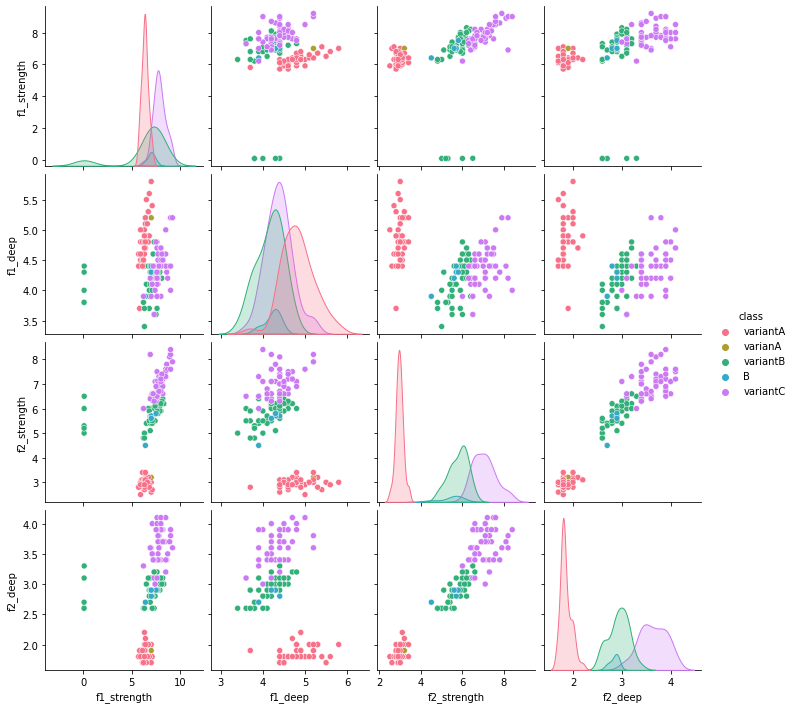

In [ ]:
# Eliminem temporalment els valors nuls 'NA'
# perquè la funció Seaborn plotting function no sap què
# fer-ne
sb.pairplot(diagnosis_data.iloc[:, 0:5].dropna(), hue="class", palette="husl")
;

A partir de la matriu de gràfics, analitzem més problemes en el joc de dades:

1. Hi ha cinc classes, quan només hauria d'haver-n'hi tres: probablement a causa d'alguns errors en els noms de les classes.

2. Hi ha alguns valors extrems que aparentment han de ser errors: una fila de `f1_deep` per a `variantA` està clarament fora del rang habitual i diverses files de `f1_strength` per a `variantB` tenen valors pròxims a zero. Haurem de buscar a què es deu.

3. Hem eliminat les files amb valors nuls per poder generar els gràfics.

En cadascun d'aquests tres casos haurem de prendre una decisió, la qual cosa ens porta al pas següent.

## Pas 3: preparació de les dades

[[ inici del document ]](#Index-de-continguts)



Fins ara hem identificat diversos problemes pel que fa a les dades, de manera que haurem de resoldre'ls abans de seguir amb l'anàlisi.

>En tenim cinc classes, mentre que només n'hi hauria d'haver tres. Tenim errors d'escriptura en el joc de dades.

Després d'interactuar amb l'equip de científics, hem vist que un d'ells es va oblidar d'afegir la paraula `variant` en algunes de les files corresponents a `variantB`. L'altra classe sobrant, `varianA`, simplement era un error de picatge que algú es va oblidar de corregir.

Farem servir l'objecte *DataFrame* per corregir aquests errors.

In [ ]:
diagnosis_data.loc[diagnosis_data['class'] == 'B', 'class'] = 'variantB'
diagnosis_data.loc[diagnosis_data['class'] == 'varianA', 'class'] = 'variantA'

diagnosis_data['class'].unique()

array(['variantA', 'variantB', 'variantC'], dtype=object)

Perfecte, ja tenim només tres classes. No ens podem permetre el luxe de generar un model que treballi amb classes que no tenen sentit.

>Hi ha alguns valors extrems que aparentment són errors: una fila de `f1_deep` pertanyent a `variantA` està clarament fora del rang normal i diverses files de `f1_strength` pertanyents a `variantB` tenen valors anormalment baixos per algun motiu.

La gestió de valors extrems no és una matèria òbvia en el món de l'analítica de dades. Normalment no és fàcil destriar si es tracta d'un error numèric o si realment respon a una anomalia en la qual hauríem d'aprofundir. Per aquest motiu, haurem de ser molt curosos quan treballem amb aquesta mena de valors. Si prenem la decisió d'excloure'ls, haurem de documentar concretament quines dades hem exclòs i, per descomptat, argumentar-ho amb raons sòlides.

En el cas concret de les files anòmales de `variantA`, els nostres companys científics ens han explicat que és impossible per a la malaltia estudiada del tipus `variantA` tenir una mesura `f1_deep` per sota de 3.9. Clarament aquest valor s'ha de revisar.

''

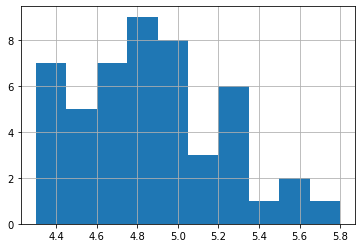

In [ ]:
# Eliminem files 'variantA' amb f1_deep per sota de 3.9
diagnosis_data = diagnosis_data.loc[(diagnosis_data['class'] != 'variantA') | (diagnosis_data['f1_deep'] >= 3.9)]
diagnosis_data.loc[diagnosis_data['class'] == 'variantA', 'f1_deep'].hist()
;

Molt bé! Observem que tots els diagnòstics `variantA` estan per sobre de 3.9.

El nostre objectiu següent serà gestionar els valors propers a zero en la mesura de `f1_strength` per al cas `variantB`. Comencem visualitzant aquestes files.

In [ ]:
diagnosis_data.loc[(diagnosis_data['class'] == 'variantB') &
              (diagnosis_data['f1_strength'] < 1.0)]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
86,variantB,0.080,4.4,6.5,3.3,13.86,3.41,4.21,24.9,92.2,4.08,4.09,2.93,4.16,5.15,4.13,5.16,512.0
87,variantB,0.073,4.3,6.0,3.1,13.35,3.47,4.52,28.1,90.2,4.22,4.01,2.90,3.94,5.30,4.16,6.11,579.0
88,variantB,0.070,4.0,5.0,2.6,13.34,3.86,4.36,23.7,86.2,4.25,4.09,2.98,3.95,5.50,3.80,5.65,697.0
89,variantB,0.068,3.8,5.3,2.7,13.78,3.13,4.20,25.7,72.2,4.50,3.99,2.92,3.98,4.44,3.87,6.11,642.0
90,variantB,0.068,3.8,5.2,2.6,13.78,3.63,4.22,20.6,83.2,3.90,3.90,3.02,4.24,5.10,3.88,5.17,497.0


Què pot haver passat? Podria ser que tots aquests valors de `f1_strength`, pròxims a zero, s'haguessin registrat en mil·límetres en lloc de centenes de mil·límetres. 

Efectivament, l'equip de científics ens confirma les nostres sospites, de manera que fem la conversió d'unitats pertinent.

''

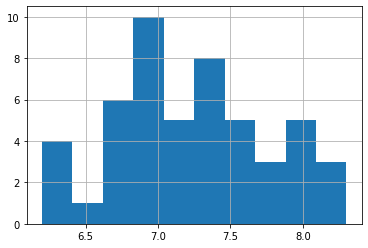

In [ ]:
diagnosis_data.loc[(diagnosis_data['class'] == 'variantB') &
              (diagnosis_data['f1_strength'] < 1.0),
              'f1_strength'] *= 100.0

diagnosis_data.loc[diagnosis_data['class'] == 'variantB', 'f1_strength'].hist()
;

Perfecte! Ja no tenim valors *outliers*, que podrien haver tingut un impacte molt negatiu en el nostre estudi.

>Hem hagut de prescindir de les files amb valors nuls per poder generar els gràfics.

Comencem visualitzant les files amb valors nuls:

In [ ]:
diagnosis_data.loc[(diagnosis_data['f1_strength'].isnull()) |
              (diagnosis_data['f1_deep'].isnull()) |
              (diagnosis_data['f2_strength'].isnull()) |
              (diagnosis_data['f2_deep'].isnull())]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
7,variantA,6.3,4.8,3.0,NaN,15.76,3.95,4.51,19.7,123.2,4.90,4.91,2.81,3.85,7.75,3.86,6.48,1312.0
8,variantA,5.7,4.3,2.9,NaN,16.53,3.44,4.07,16.1,99.2,5.10,5.38,2.79,4.58,7.90,3.88,5.75,1062.0
9,variantA,6.2,4.5,3.0,NaN,15.56,3.15,4.17,18.1,100.2,5.28,5.55,2.72,4.45,9.92,3.81,6.45,1062.0
10,variantA,6.7,5.1,3.0,NaN,15.80,3.96,4.20,20.1,107.2,5.25,5.72,2.72,4.98,8.45,4.05,6.07,1527.0
11,variantA,6.1,4.8,3.1,NaN,15.82,3.28,4.22,18.9,97.2,4.50,4.83,2.76,4.17,7.70,3.97,5.72,1297.0
109,variantB,NaN,NaN,NaN,NaN,13.31,3.15,4.60,22.1,96.2,5.04,5.32,2.79,5.09,5.35,3.76,6.16,697.0
110,variantB,NaN,NaN,NaN,NaN,13.16,5.54,3.72,21.6,109.2,5.48,4.98,2.74,6.18,5.60,3.55,5.71,579.0
111,variantB,NaN,NaN,NaN,NaN,14.22,4.23,4.07,23.1,90.2,4.85,4.67,2.76,3.82,4.70,3.70,5.68,342.0
112,variantB,NaN,NaN,NaN,NaN,13.46,4.48,4.82,22.1,105.2,4.05,4.43,3.10,3.65,6.50,4.03,5.40,624.0
113,variantB,NaN,NaN,NaN,NaN,13.11,2.54,4.40,23.1,90.2,4.78,4.41,2.92,4.04,5.78,3.90,5.21,451.0


Observem que per als casos de `variantB` les primeres quatre característiques tenen totes valors nuls, de manera que optem per eliminar aquestes entrades, ja que el nostre estudi se centra precisament en aquestes quatre columnes i hi ha massa files. Amb tantes files, emplenar amb mitjanes generaria un biaix cap a la mitjana que no seria adequat per generalitzar.

In [ ]:
diagnosis_data.dropna(subset=['f1_strength','f1_deep','f2_strength'], inplace = True)
diagnosis_data.loc[(diagnosis_data['f1_strength'].isnull()) |
              (diagnosis_data['f1_deep'].isnull()) |
              (diagnosis_data['f2_strength'].isnull()) |
              (diagnosis_data['f2_deep'].isnull())]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
7,variantA,6.3,4.8,3.0,NaN,15.76,3.95,4.51,19.7,123.2,4.90,4.91,2.81,3.85,7.75,3.86,6.48,1312.0
8,variantA,5.7,4.3,2.9,NaN,16.53,3.44,4.07,16.1,99.2,5.10,5.38,2.79,4.58,7.90,3.88,5.75,1062.0
9,variantA,6.2,4.5,3.0,NaN,15.56,3.15,4.17,18.1,100.2,5.28,5.55,2.72,4.45,9.92,3.81,6.45,1062.0
10,variantA,6.7,5.1,3.0,NaN,15.80,3.96,4.20,20.1,107.2,5.25,5.72,2.72,4.98,8.45,4.05,6.07,1527.0
11,variantA,6.1,4.8,3.1,NaN,15.82,3.28,4.22,18.9,97.2,4.50,4.83,2.76,4.17,7.70,3.97,5.72,1297.0


Ens queda encara una resta de valors nuls en la característica `f2_deep` dels casos `variantA`.
Eliminant totes aquestes files estem pagant un preu alt, perquè totes  pertanyen a la classe `variantA` i només tenim el problema en una característica. El problema que ens trobem és que el nostre joc de dades queda **esbiaixat**, ja que tots els problemes de valors nuls es concentren en una mateixa tipologia de malaltia. Com a conseqüència, tindrem menys informació sobre aquesta classe i aquest fet ens podria portar a construir un model incorrecte.

Amb aquestes circumstàncies, una bona opció seria emplenar els valors nuls amb la mitjana d'aquesta característica dins de la seva classe: si sabem que els valors d'aquesta mesura haurien d'estar dins d'un cert rang, llavors té sentit emplenar-los amb valors com la mitjana.

Vegem com podem fer-ho.

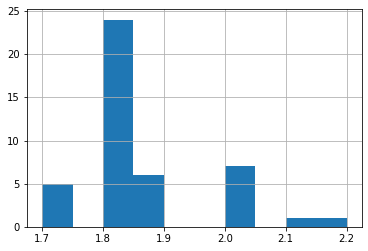

In [ ]:
diagnosis_data.loc[diagnosis_data['class'] == 'variantA', 'f2_deep'].hist();

La majoria de valors `f2_deep` per a `variantA` es mantenen en el rang 1.8-1.9, de manera que optarem per informar els valors nuls amb el valor de la mitjana.

In [ ]:
average_f2_deep = diagnosis_data.loc[diagnosis_data['class'] == 'variantA', 'f2_deep'].mean()

diagnosis_data.loc[(diagnosis_data['class'] == 'variantA') &
              (diagnosis_data['f2_deep'].isnull()),
              'f2_deep'] = average_f2_deep

diagnosis_data.loc[(diagnosis_data['class'] == 'variantA') &
              (diagnosis_data['f2_deep'] == average_f2_deep)]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter
7,variantA,6.3,4.8,3.0,1.85,15.76,3.95,4.51,19.7,123.2,4.90,4.91,2.81,3.85,7.75,3.86,6.48,1312.0
8,variantA,5.7,4.3,2.9,1.85,16.53,3.44,4.07,16.1,99.2,5.10,5.38,2.79,4.58,7.90,3.88,5.75,1062.0
9,variantA,6.2,4.5,3.0,1.85,15.56,3.15,4.17,18.1,100.2,5.28,5.55,2.72,4.45,9.92,3.81,6.45,1062.0
10,variantA,6.7,5.1,3.0,1.85,15.80,3.96,4.20,20.1,107.2,5.25,5.72,2.72,4.98,8.45,4.05,6.07,1527.0
11,variantA,6.1,4.8,3.1,1.85,15.82,3.28,4.22,18.9,97.2,4.50,4.83,2.76,4.17,7.70,3.97,5.72,1297.0


In [ ]:
diagnosis_data.loc[(diagnosis_data['f1_strength'].isnull()) |
              (diagnosis_data['f1_deep'].isnull()) |
              (diagnosis_data['f2_strength'].isnull()) |
              (diagnosis_data['f2_deep'].isnull())]

,class,f1_strength,f1_deep,f2_strength,f2_deep,concavity,smoothness,compactness,texture,area,density,intensity,markerA,markerB,markerC,markerD,simetry,perimeter


Perfecte! Ja no tenim valors nuls en el nostre joc de dades.

**Nota:** el joc de dades conté més valors nuls en altres característiques. Per simplificar, només ens estem centrant en les quatre primeres.

Arribats a aquest punt, i per no repetir tots aquests passos, optarem per guardar el joc de dades ja net. 

In [ ]:
diagnosis_data.to_csv('diagnosis-data-clean.csv', index=False)

diagnosis_data_new = pd.read_csv('diagnosis-data-clean.csv')
diagnosis_data_clean = diagnosis_data_new.iloc[:,0:5]

Després de preparar les dades, val la pena generar una matriu de gràfics per donar un cop d'ull general a les dades i certificar que les correccions que hem aplicat fins ara funcionen.

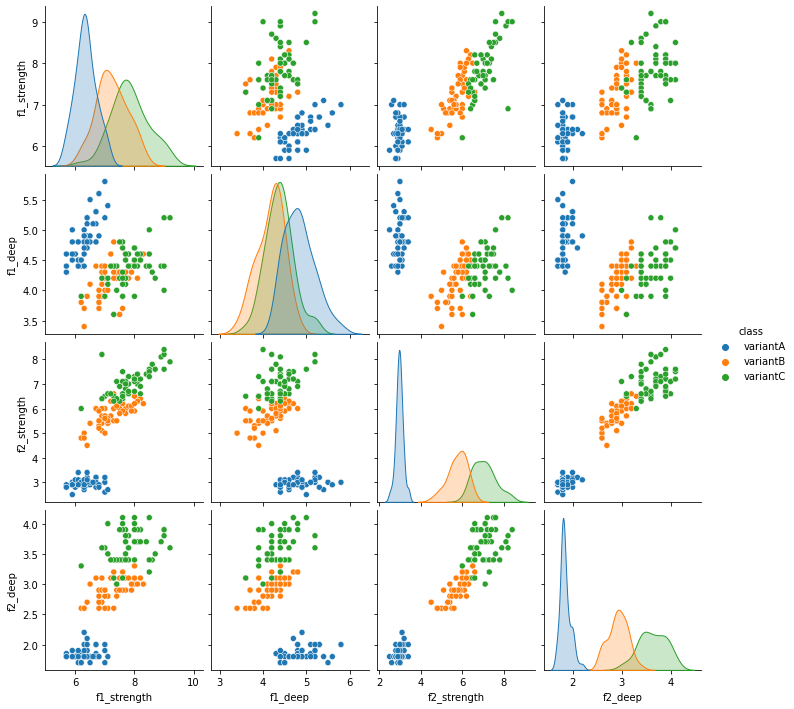

In [ ]:
sb.pairplot(diagnosis_data_clean, hue='class');

Les petites modificacions que hem fet sobre el joc de dades original ens han servit per mostrar alguns dels aspectes que cal tenir en compte i valorar les opcions que tenim per gestionar-los.

Les bones pràctiques que cal tenir en compte haurien de ser les següents:

* Assegurar-se que les dades s'han registrat correctament.

* Assegurar-se que les dades estan dins de rangs de valors acceptables i fer servir el coneixement d'experts en la matèria per valorar si els valors són o no normals.

* Gestionar els valors nuls, ja sigui informant valors nous o eliminant les files afectades.

* No condicionar mai les dades manualment perquè pot induir a nous errors i no és una pràctica reproduïble.

* Fer servir codi com una manera de deixar constància de les accions de preparació de les dades que s'han dut a terme.

* Generar gràfics en aquest punt de l'estudi analític per verificar d'una manera visual que el joc de dades fa bona pinta.

## Verificacions addicionals

[[ inici del document ]](#Index-de-continguts)

Una bona pràctica aconsellable principalment per verificar que la preparació de les dades compleix una sèrie de requisits preestablers és la de fer un seguit de verificacions mitjançant codi.

D'aquesta manera, podrem assegurar d'una manera ràpida i automatitzada un nivell de qualitat mínim en el nostre joc de dades. La instrucció de Python que cal tenir en compte és `assert`. Amb aquesta ordre assegurem que una afirmació determinada es compleix. Si realment l'afirmació es compleix, llavors el *notebook* segueix endavant i no passa res; no obstant això, si l'afirmació no es compleix, llavors el *notebook* s'atura i llança un missatge d'error advertint el problema. Per exemple:

```Python
assert 1 == 2
```

Generarà un missatge `AssertionError` i paralitzarà l'execució del *notebook* perquè l'afirmació no es compleix.

Vegem com podem utilitzar en el nostre cas aquesta funcionalitat de Python.

In [ ]:
# Sabem que només hauríem de tenir tres classes corresponents a les variants de la malaltia estudiada
assert len(diagnosis_data_clean['class'].unique()) == 3

In [ ]:
# També sabem que la f1_strength per a la classe 'variantB' mai hauria d'estar per sota de 3.9
assert diagnosis_data_clean.loc[diagnosis_data_clean['class'] == 'variantB', 'f1_strength'].min() >= 3.9

In [ ]:
# Sabem que el nostre joc de dades no hauria de tenir valors nuls
assert len(diagnosis_data_clean.loc[(diagnosis_data_clean['f1_strength'].isnull()) |
                               (diagnosis_data_clean['f1_deep'].isnull()) |
                               (diagnosis_data_clean['f2_strength'].isnull()) |
                               (diagnosis_data_clean['f2_deep'].isnull())]) == 0

I així podríem continuar amb més verificacions. Si alguna d'aquestes assumpcions falla, el *notebook* es pararà i ens enviarà un missatge d'error perquè gestionem el problema.

## Pas 4: anàlisi exploratòria

[[ inici del document ]](#Index-de-continguts)



A la fase d'anàlisi exploratòria comencem a aprofundir més en les dades. En aquest estadi ja no tenim valors extrems ni valors nuls ni errors en les dades, de manera que podem començar a plantejar preguntes com les següents:

* Quin tipus de distribucions tinc al meu joc de dades?

* Hi ha correlacions entre característiques?

* Hi ha factors concrets que puguin explicar aquestes correlacions?

Aquesta és la fase en què explotem més a fons les capacitats de visualització que tenim a l'abast. Generarem molts gràfics que no necessàriament seran bonics, però en aquesta fase no ens n'hem de preocupar, ja que seran d'ús intern.

Tornem a fer servir la matriu de gràfics que ja coneixem de passos anteriors.

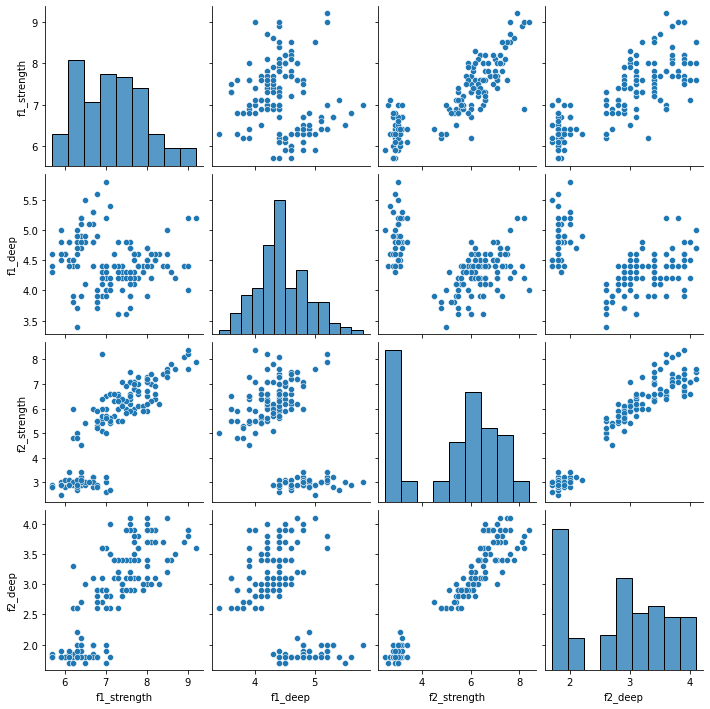

In [ ]:
sb.pairplot(diagnosis_data_clean);

Observem que les característiques _f1_ (`f1_strengt`, `f1_deep`) estan normalment distribuïdes, fet que ens beneficia si fem servir models que pressuposen una distribució normal de dades.

No obstant això, observem una cosa estranya en les característiques _f2_. Potser hi ha particularitats entre les diferents variants de la malaltia. Assignem colors diferents a cada classe per entendre millor què passa.

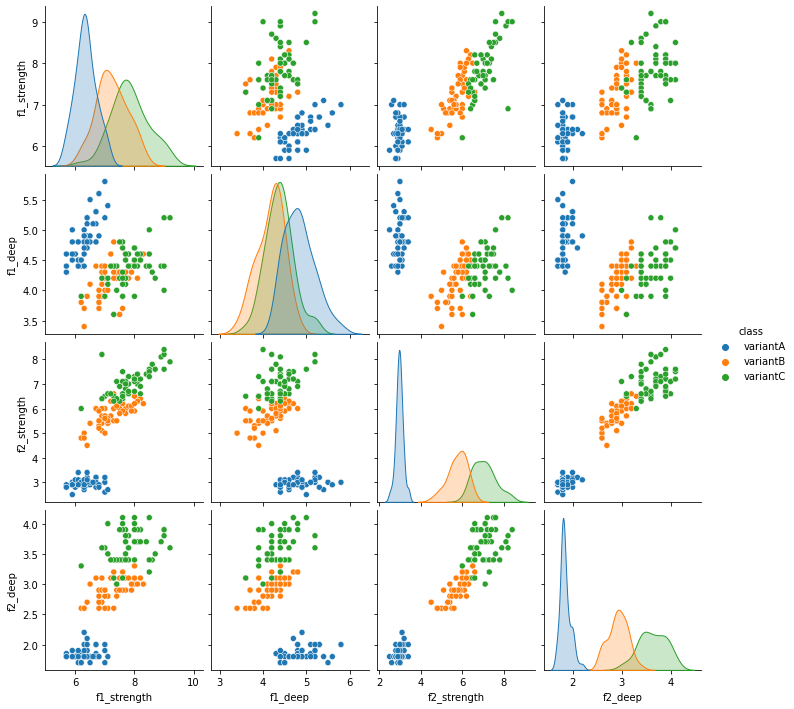

In [ ]:
sb.pairplot(diagnosis_data_clean, hue='class');

Ara veiem clarament que la distribució estranya que vèiem abans es deu a la mescla de les diferents classes. Bones notícies, ja que apreciem que, efectivament, dins de cada variant s'entreveu una distribució pròxima a la normal. Addicionalment, aquest comportament diferent de cada variant facilitarà la feina de classificació, ja que les distribucions  de `variantA` respecte de la resta de variants són clarament diferents.

A més, també anticipem possibles dificultats en el procés de classificació entre `variantB` i `variantC`, ja que les distribucions de les seves característiques se solapen.

També apreciem correlacions entre les mesures _f2_, així com entre les mesures _f1_. Els científics ens asseguren que aquest fet era d'esperar i que està completament dins de la normalitat.

Farem servir gràfics de violí,  **_violin plots_** en anglès, per comparar les distribucions de les característiques entre diferents variants. Els gràfics de violí contenen la mateixa informació que els [_box plots_](https://en.wikipedia.org/wiki/box_plot), però, a més, aporten informació sobre les zones de densitat de dades.

In [ ]:
diagnosis_data_clean.columns

Index(['class', 'f1_strength', 'f1_deep', 'f2_strength', 'f2_deep'], dtype='object')

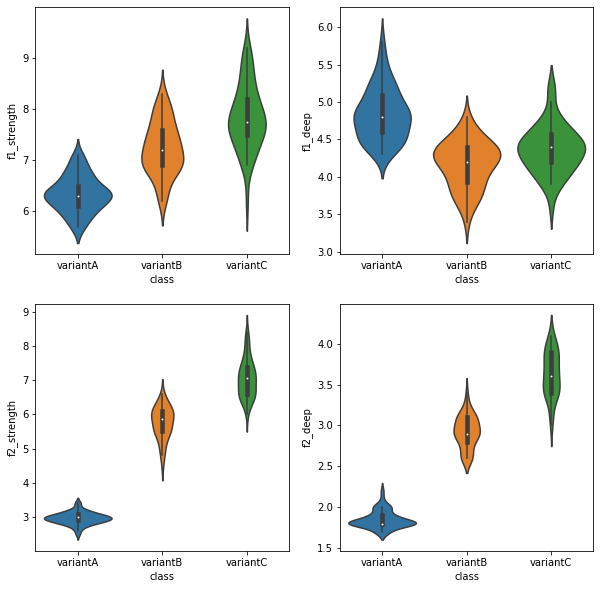

In [ ]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(diagnosis_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 0)
    sb.violinplot(x='class', y=column, data=diagnosis_data_clean)

Ara ja estem en disposició d'iniciar la fase de modelatge, la més atractiva per a la majoria del públic.

## Pas 5: classificació

[[ inici del document ]](#Index-de-continguts)

Val la pena observar que en aquest punt ja hem fet molta feina amb les dades i encara no hem generat ni un sol model.

Les tasques anteriors poden semblar avorrides i tedioses, però sense les tasques de preparació, verificació i exploració ara generaríem models de classificació sense gairebé capacitat de generalització.

Apunteu la màxima següent: «**bad data leads to bad models**». Verifiqueu sempre les dades abans de res.

<hr />

El primer que necessitarem per alimentar el nostre generador de models de classificació és proporcionar-li dos jocs de dades: el d'entrenament i el de proves.

Un **_training set_** és un subconjunt aleatori del joc de dades que farem servir per entrenar els nostres models.

Un **_testing set_** és un subconjunt aleatori del joc de dades (mútuament excloent del *training set*) que farem servir per validar la capacitat predictiva dels models generats. 

Especialment en jocs de dades disperses com el nostre, és fàcil que els models caiguin en el sobreentrenament o **_overfit_**, és a dir, el model s'adapta en excés a les dades que coneix i, en conseqüència, és incapaç de generalitzar sobre dades que no ha vist mai. Per aquest motiu és important generar el model amb un joc de dades i validar-lo amb un altre totalment diferent.

És important notar que una vegada hàgim separat en dos el nostre joc de dades (*training set* + *testints set*), hauríem de tractar el *testing set* com si mai hagués existit, és a dir, no ha de participar en cap moment en el procés d'entrenament del model; en cas contrari, ens estaríem posant paranys a nosaltres mateixos.

Comencem separant el joc de dades.


In [ ]:
diagnosis_data_clean = pd.read_csv('diagnosis-data-clean.csv')

# Farem servir totes les característiques de mesura com a dades d'entrada
# Noteu que scikit-learn espera com a dades d'entrada una llista de valors, per exemple:
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# de manera que el nostre joc de dades d'entrada serà en realitat una llista de llistes

# Podem fer servir Pandas per generar la nostra llista de dades:
all_inputs = diagnosis_data_clean[['f1_strength', 'f1_deep',
                             'f2_strength', 'f2_deep']].values

# De la mateixa manera, podem obtenir una llista de classes
all_labels = diagnosis_data_clean['class'].values

# Haurem d'anar amb compte de no barrejar els índexs de les dues llistes de valors
# els valors d'all_inputs[5] haurien de correspondre a la classe en all_labels[5]

# Aquest és l'aspecte que té la nostra llista de valors:
all_inputs[:5]

array([[6.4, 4.9, 2.9, 1.8],
       [6.2, 4.4, 2.9, 1.8],
       [6. , 4.6, 2.8, 1.8],
       [5.9, 4.5, 3. , 1.8],
       [6.3, 5. , 2.9, 1.8]])

Ara les nostres dades estan llestes per separar-se en dos:

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

Una vegada tenim el nostre joc de dades separat en *training set* i *testing set* i ateses les directrius del nostre responsable de dades, generem un model de classificació.

Una de les millors opcions que tenim és la de començar pels arbres de decisió. Aquests tenen una propietat interessant: són **escalar-invariants**, és a dir, l'escala en la qual estan representades les característiques del joc de dades no afecta en absolut el seu rendiment, contràriament a altres models de mineria de dades, que sí que requereixen que les dades estiguin prèviament normalitzades. En altres paraules, no importa si les nostres característiques prenen valors entre 0 i 1 o entre 0 i 1,000; els arbres de decisió funcionaran igualment en tots dos casos.

Hi ha alguns [paràmetres](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) amb els quals podem jugar per intentar millorar el rendiment dels arbres de decisió. De totes maneres, ara per ara, fem servir els valors per defecte.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

Molt bé! Inicialment el nostre model obté una precisió del 97% en el procés de classificació.

No obstant això, hi ha un parany: depenent de com s'han distribuït les dades entre el *training set* i el *testing set*, el nostre model pot arribar a tenir nivells de predicció del 80% al 100%.

Per veure aquest efecte, repetirem mil vegades la tasca de generació aleatòria de jocs de dades *training set* i *testing set* i generació d'arbre de decisió.

''

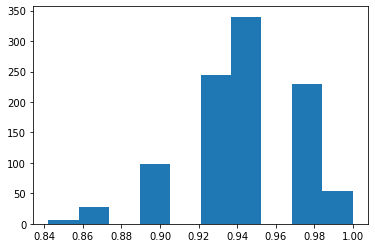

In [ ]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

Òbviament, ens trobem davant un problema. No és bo que en funció de la distribució de dades que fem tinguem tanta diferència en la capacitat predictiva del nostre model de classificació. Aquest fenomen rep el nom de _sobreentrenament_ o **_overfitting_**. El model aprèn a classificar el *training set* tan bé que després és incapaç de generalitzar en noves dades el que ha après.

### _Cross-validation_

[[ inici del document ]](#Index-de-continguts)

El problema del sobreentrenament és la principal raó per la qual molts analistes opten per la funcionalitat **_k-fold cross-validation_** en els seus models: separar el joc de dades original en _k_ subconjunts per emprar-ne un com a *testing set* i la resta de subconjunts com a *training set*. Aquest procés es repeteix _k_ vegades, de manera que cada subconjunt es fa servir com a *testing set* exactament una vegada.

_k_ = 10 és la fórmula més utilitzada, de manera que la provarem:

(Cada quadrat és una entrada en el nostre joc de dades.)

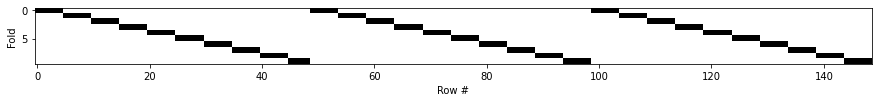

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Observeu que en el codi anterior hem utilitzat la variant **_stratified *k*-fold cross-validation_**. Aquesta tècnica ens ofereix l'avantatge de mantenir les proporcions entre els _k_ subconjunts de dades que va generant, fet que ens aporta avantatges a l'hora de mantenir la representativitat de cada subconjunt (p. ex., no tindrem 100% de classes `variantA` en un dels subconjunts).

Apliquem ara _10-fold cross-validation_ sobre el nostre model amb el codi següent:

''

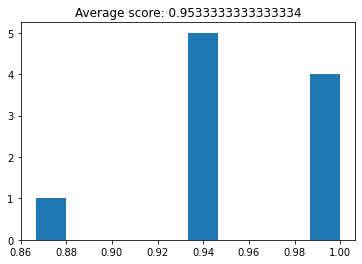

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score devuelve una lista de scores, que podemos visualizar
# para obtener una estimación razonable del rendimiento de nuestro clasificador
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

Ara tenim unes puntuacions de predicció del nostre classificador més consistents.

### _Parameter tuning_

[[ inici del document ]](#Index-de-continguts)

Cada model de mineria de dades té associats una sèrie de paràmetres sobre els quals podem fer ajustos amb la intenció de millorar el model. Per exemple, si reduïm significativament el paràmetre `max_depth` del nostre arbre de decisió:

''

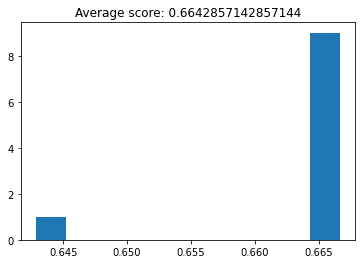

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

La precisió del model decau significativament.

En conseqüència, necessitem disposar d'un procés que ens permeti triar la combinació òptima de paràmetres per aconseguir els nivells més alts possibles de rendiment en els nostres models.

Un dels mètodes més habituals per dur a terme els *parameter tuning* de models és **Grid Search**. La idea rere aquest model és simple: provar sobre un rang de paràmetres fins a trobar els valors que ofereixen un millor rendiment del model. Hem de centrar la nostra intuïció com a analistes a triar el millor rang possible perquè sigui el mètode **Grid Search** el que s'encarregui de determinar els valors òptims dins del rang que nosaltres li hem fixat. Es tracta d'un procés iteratiu d'adequació de rangs i cerca de valors òptims.

Posem en pràctica un procés de *tuning* sobre el nostre arbre de decisió. Treballarem només amb dos paràmetres per començar (`max_depth` i `max_features`), però podríem arribar a treballar amb molts més.

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_depth': 3, 'max_features': 3}


Visualitzem el resultat en un gràfic per entendre millor les combinacions possibles:

''

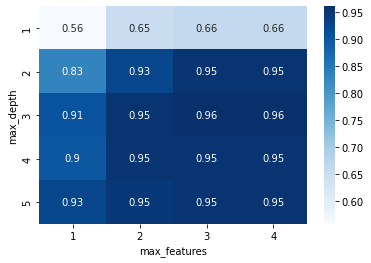

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Aquest gràfic ens permet tenir una visió global de l'espai de paràmetres. Això ens permet saber que necessitem un valor `max_depth` com a mínim de dos per disposar d'un arbre de decisió amb precisió acceptable.

No obstant això, sembla que el paràmetre `max_features` no és gaire significatiu si mantenim dues característiques, fet que té sentit, ja que el nostre joc de dades en té només quatre (recordem que una de les nostres classes era fàcilment separable fent servir tan sols una característica).

Seguim endavant i fem servir més paràmetres en el procés de *tunning*.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9600000000000002
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'splitter': 'best'}


Ara ja podem seleccionar el millor model dels que tenim a Grid Search:

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Podem visualitzar el nostre arbre de decisió fent servir l'eina [GraphViz](http://www.graphviz.org/) per poder apreciar quina lògica segueix a l'hora de prendre decisions:

In [ ]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('diagnosis_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

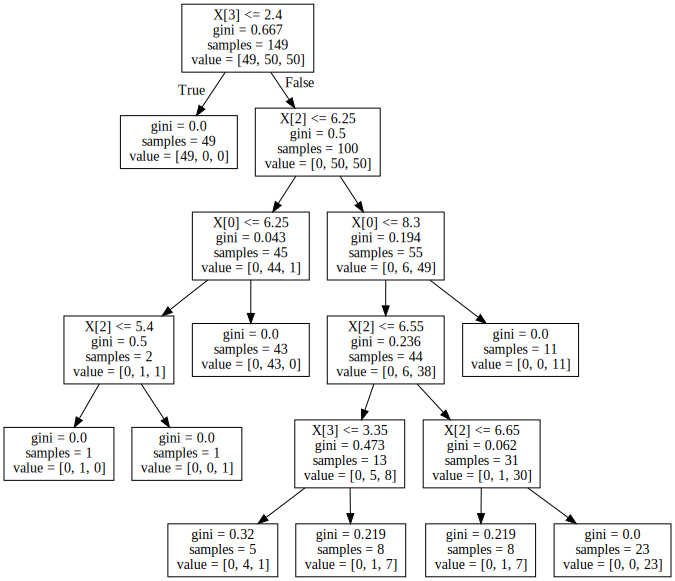

In [ ]:
# Visualització del gràfic generat i guardat en el fitxer diagnosi_dtc.dot
import graphviz
from IPython.display import display

with open("diagnosis_dtc.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


Acabem de generar un arbre de decisió a partir de les quatre primeres característiques del nostre joc de dades:

_X_[0] = `f1_strengt`  
_X_[1] = `f1_deep`  
_X_[2] = `f2_strengt`  
_X_[3] = `f2_deep`  

Observem que en el primer node es planteja la primera pregunta:  
Files amb `f2_deep` per sota de 2.337.
La resposta positiva presa `value = [49,0,0]`, indicant que tenim 49 casos de `variantA`.
La resposta negativa presa `value = [0,50,50]`, indicant que tenim 50 casos de `variantB` i 50 casos més de `variantC`.

Una vegada generada una primera versió del nostre model, crearem alguns gràfics amb l'objectiu que ens ajudin a visualitzar-ne el rendiment per poder presentar-lo al responsable de dades de New Diagnosis LLC.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


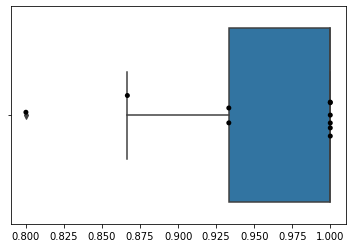

In [ ]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black');

Vaja... com a gràfic no sembla gaire espectacular. Potser si generem un altre classificador i els comparem serà més fàcilment explicable.

Sabem per experiència que l'algorisme Random Forest sol donar millors resultats que altres arbres de decisió individuals. Un problema endèmic dels arbres de decisió és que són propensos a sobreentrenar: incrementen la complexitat fins a arribar a classificar gairebé perfectament el *training set*, però quan es tracta de generalitzar sobre dades que no han vist abans, fallen.

**Random Forest** pot superar aquesta limitació creant un grup d'arbres de decisió, *forest*, cadascun entrenat amb subconjunts de dades aleatòries (construïts amb reposició de valors) i característiques (també amb reposició) —i posant a treballar tots els arbres junts fins a aconseguir la millor decisió en cada cas—.

Vegem si Random Forest realment funciona millor:

Un dels avantatges de treballar amb *scikit-learn* és que les parts de _training_, _testing_, _parameter tuning_, etc. les poden reaprofitar tots els models, de manera que només necessitem passar-los tal qual a les funcions que anem fent servir.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9666666666666666
Best parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 50}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

''

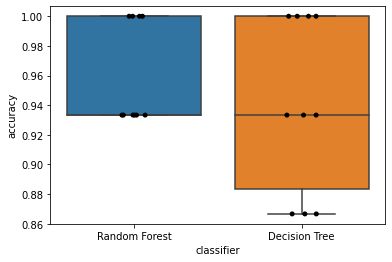

In [ ]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

Ara fa més bona pinta. Tots dos models mostren un bon rendiment en aquest joc de dades. Potser això es deu a la nostra voluntat de mantenir la senzillesa de l'estudi. Aquest compromís ha fet que tota l'estona treballem només amb **quatre de les disset característiques disponibles**. **Random Forest**, no obstant això, funciona especialment bé quan treballa amb centenars de característiques. En altres paraules, tampoc hi havia tant d'espai per a la millora.

## Pas 6: reproductibilitat

[[ inici del document ]](#Index-de-continguts)

L'últim pas i, probablement, el més important en qualsevol anàlisi és assegurar-se que la feina que hem fet és reproduïble. **Com a norma general, no hauríem de donar gaire importància a un descobriment que no puguem reproduir**. Com a tal, si la nostra anàlisi no és reproduïble, és com si no l'haguéssim fet.

Un *notebook* com aquest s'ha fet deliberadament extens per fer que el nostre estudi sigui reproduïble. Hem documentat pas a pas tot el que anàvem fent, disposem d'un registre escrit de text i codi del que hem fet i del perquè ho hem fet. Tot això atorga **credibilitat** a l'estudi, ja que el converteix en verificable i, per descomptat, en millorable. A més, al seu torn pot ser un **punt de partida per a noves iniciatives**.

Més enllà de registrar el que hem fet, també hauríem de documentar el programari i el maquinari que hem fet servir per generar la nostra anàlisi. Aquestes dades solen mostrar-se a l'inici de l'estudi perquè els nostres lectors sàpiguen quines eines necessitaran.


In [ ]:
import sys
print('Python       :', sys.version)
import platform
print('Platform     :', platform.platform())
print('version      :', platform.version())
print('node         :', platform.node())

Python       : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Platform     : Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
version      : #1 SMP Sat Jun 5 09:50:34 PDT 2021
node         : 0ebec0a77394


Per acabar, sintetitzem tots els passos essencials del nostre estudi.

[6.3 4.4 3.1 1.8]	-->	variantA	(Actual: variantA)
[8.  3.9 7.3 3.4]	-->	variantC	(Actual: variantC)
[6.5 4.9 3.  1.8]	-->	variantA	(Actual: variantA)
[7.7 4.2 7.1 3.7]	-->	variantC	(Actual: variantC)
[7.8 4.4 7.3 3.8]	-->	variantC	(Actual: variantC)
[7.4 4.  7.1 3. ]	-->	variantC	(Actual: variantC)
[6.8 4.9 2.8 1.8]	-->	variantA	(Actual: variantA)
[7.3 3.6 5.5 2.6]	-->	variantB	(Actual: variantB)
[7.  4.4 5.7 2.8]	-->	variantB	(Actual: variantB)
[7.3 4.4 6.3 3.4]	-->	variantC	(Actual: variantC)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


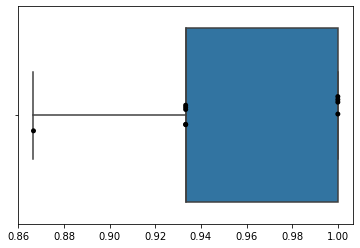

In [ ]:
    %matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Ens estalviem tota la part de preprocessament de dades i partim directament del joc de dades net.
diagnosis_data_clean = pd.read_csv('diagnosis-data-clean.csv')

# Per a més seguretat, verifiquem el nostre joc de dades. Si alguna de les nostres suposicions no és correcta,
# el codi no seguirà executant-se.

# Sabem que només hauríem de tenir 3 classes
assert len(diagnosis_data_clean['class'].unique()) == 3

# Sabem que f1_strength per a 'variantB' no hauria d'estar per sota de 3.9
assert diagnosis_data_clean.loc[diagnosis_data_clean['class'] == 'variantB', 'f1_strength'].min() >= 3.9

# Sabem que el nostre joc de dades no hauria de contenir valors nuls
assert len(diagnosis_data_clean.loc[(diagnosis_data_clean['f1_strength'].isnull()) |
                               (diagnosis_data_clean['f1_deep'].isnull()) |
                               (diagnosis_data_clean['f2_strength'].isnull()) |
                               (diagnosis_data_clean['f2_deep'].isnull())]) == 0

all_inputs = diagnosis_data_clean[['f1_strength', 'f1_deep',
                             'f2_strength', 'f2_deep']].values

all_labels = diagnosis_data_clean['class'].values

# Guardem el classificador obtingut a partir de Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)

# Només ens queda visualitzar les puntuacions obtingudes en el procés de cross-validation
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...i per descomptat, mostrar algunes de les prediccions obtingudes a partir del model classificador
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
  print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

I aquí ho tenim: hem construït un procés de mineria de dades completament reproduïble que servirà de versió demo per al responsable de dades de New Diagnosis LLC. A més, hem aconseguit l'objectiu analític que havíem fixat a l'inici de l'estudi (> 90% predicció) i el nostre codi és prou flexible com per acceptar noves variants de la malaltia estudiada amb noves dades. No està gens malament!

## Conclusions

[[ inici del document ]](#Index-de-continguts)

Aquest cas d'estudi forma part del material didàctic de l'asignatgura de Mineria de dades dels Estudis d'Informàtica de la UOC.

S'ha seleccionat aquest format per la senzillesa del joc de dades, pel bon encaix en una idea de negoci i, sobretot, pel **desenvolupament meticulós i rigorós del procés analític** en el qual cada pas està inspirat en un **decàleg de bones pràctiques** que podran servir a l'estudiant per créixer en aquest àmbit de coneixement.

A més, el joc de dades ofereix possibilitats més enllà de les explorades en aquest *notebook*, ja que tan sols s'han fet servir quatre de les disset característiques descriptives disponibles.



## Agraïments

[[ inici del document ]](#Indice-de-continguts)

Volem agrair, en primer lloc, la inspiració del treball de [Randal  S. Olson](http://www.randalolson.com/) en el seu [*notebook repository*](https://github.com/rhiever/data-analysis-and-machine-learning-projects/).

També volem donar les gràcies a [Andreas Mueller](http://amueller.github.io/) per alguns dels seus [exemples](https://github.com/amueller/scipy_2015_sklearn_tutorial) de l'apartat sobre *machine learning*. 

Finalment, agraïm a Estoc Free Images la cessió de la imatge del laboratori: © Senk | <a href="https://www.stockfreeimages.com/">Estoc Free Images</a>